In [146]:
import numpy as np
import pandas as pd

In [147]:
df = pd.read_csv("C:\\Users\\jj\\통계적 분석\\source\\python_stat_sample-master\\data\\ch2_scores_em.csv", index_col ="student number")
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [148]:
scores = np.array(df['english'])[:10]
print(scores)

[42 69 56 41 57 48 65 49 65 58]


In [149]:
scores_df = pd.DataFrame({'score' :scores},
                         index =pd.Index([ 'A', 'B', 'C', 'D', 'E',
                                           'F', 'G', 'H', 'I', 'J'], name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


array scores 를 정렬하여 중앙값 구하기

In [150]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [151]:
n = len(sorted_scores)
if n % 2 == 0 :
    m0 = sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0+m1) / 2
else :
    median = sorted_scores[(n+1)//2 -1]
median

56.5

구하는 내장 함수가 있다

In [152]:
np.median(sorted_scores)

56.5

#최빈값 구하기

In [153]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [154]:
pd.Series([1,2,3,4,5]).mode

<bound method Series.mode of 0    1
1    2
2    3
3    4
4    5
dtype: int64>

# 편차
:각 데이터가 평균으로부터 떨어져 있는 정도

In [155]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [156]:
another_scores = [50,60,58,54,51,56,57,53,52,59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [157]:
np.mean(deviation)
np.mean(another_deviation)

0.0

In [158]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


# 분산

-> scores 보다 another_scores의 편차가 더 작다.
편차를 비교 하기 위해 편차를 평균 내게 되면 부호 때문에 비교가 어려움 -> 제곱하여 평균내기.... 분산!

In [159]:
np.mean(deviation ** 2)

86.0

var 함수로 분산을 구할 수 있음 

In [160]:
np.var(scores)

86.0

Pandas는 DataFrame 이나 Seies의 var 메서드는 불편분산....(불편 분산은 데이터 개수 -1 로 나눈다.)

In [161]:
scores_df.var()

score    95.555556
dtype: float64

분산 열도 추가

In [162]:
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


분산은 편차의 제곱이므로 원래 데이터와 단위가 다르다. 따라서 분산의 제곱근을 취하여 표준 편차를 구한다.

In [163]:
np.sqrt(np.var(scores, ddof=0)) #ddof=0 은 표준분산
np.std(scores, ddof=0)

9.273618495495704

ddof 가 1이면?

In [164]:
np.sqrt(np.var(scores, ddof=1)) #ddof=0 은 표준분산
np.std(scores, ddof=1)

9.775252199076787

범위 구하기(최댓값 - 최솟값)

In [165]:
np.max(scores) - np.min(scores)

28

**사분위 범위**
1분위수(Q1) => 25% <br>
2분위수(Q2) => 50% <br>
3분위수(Q3) => 75% <br>
IQR = Q3-Q1 ... 데이터가 가장 밀집되어있는 구간

In [166]:
scores_Q1 = np.percentile(scores, 25)
scores_Q2 = np.percentile(scores, 50)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

이 지표들을 모두 보여주는 메서드가 있음

In [167]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

# 표준화
상대적 결과를 통일된 지표로 변환하는 작업 <br>
데이터에서 평균을 빼고 표준편차로 나눠서 **Z-score** 을 구한다.

In [168]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

표준화된 데이터는 평균이 0이고 표준편차가 1 이다

In [169]:
np.mean(z) , np.std(z, ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

**편찻값** : 평균이 50 ,표준편차가 10이 되도록 정규화한 값

In [170]:
z = 50 + 10*(scores - np.mean(scores)) / np.std(scores)
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [171]:
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


# 도수분포표

In [172]:
english_scores = np.array(df['english'])
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [173]:
freq, _ = np.histogram(english_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [174]:
# 0~10, 10~20, ... 이라는 문자열의 리스트를 작성
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
# freq_class 를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency':freq},
                                index=pd.Index(freq_class,
                                                name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


## 계급값
각 계급을 대표하는 값으로, 계급의 중앙값을 이용한다

In [175]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

## 상대도수
전체 데이터에 대해서 해당 계급의 데이터가 차지하는 비율

In [176]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

## 누적상대도수
해당 계급까지의 상대도수의 합

In [177]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [178]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency',
                                'relative frequency', 'cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


## 최빈값
최대가 되는 계급의 계급값

In [179]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

# 데이터의 시각화

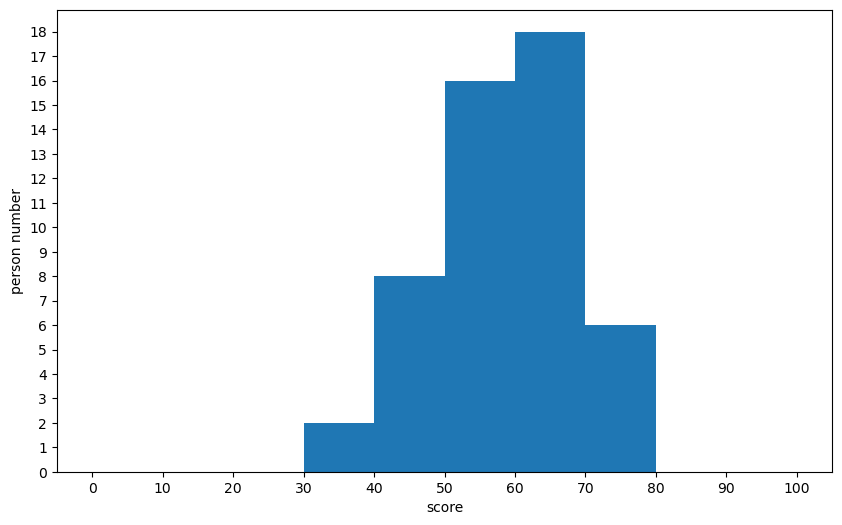

In [183]:
import matplotlib.pyplot as plt

#캔버스 생성
#figsize로 가로 세로 크기 지정
fig = plt.figure(figsize=(10,6))
#캔버스 위에 그래프를 그리기 위한 영역 지정
#인수는 영역을 1by1 개 지정, 하나의 영역에 그린다는 것을 의미4
ax = fig.add_subplot(111)

#계급수를 10으로 하여 히스토그램 그리기
freq, _, _ = ax.hist(english_scores, bins=10, range=(0, 100))
#x축에 레이블 부여
ax.set_xlabel('score')
#y축에 레이블 부여
ax.set_ylabel('person number')
#x축을 0, 10, 20, ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0,100, 10+1))
#y축을 0, 1, 2, ...의 눈금으로 구분
ax.set_yticks(np.arange(0, freq.max()+1))
#그래프 표시
plt.show()

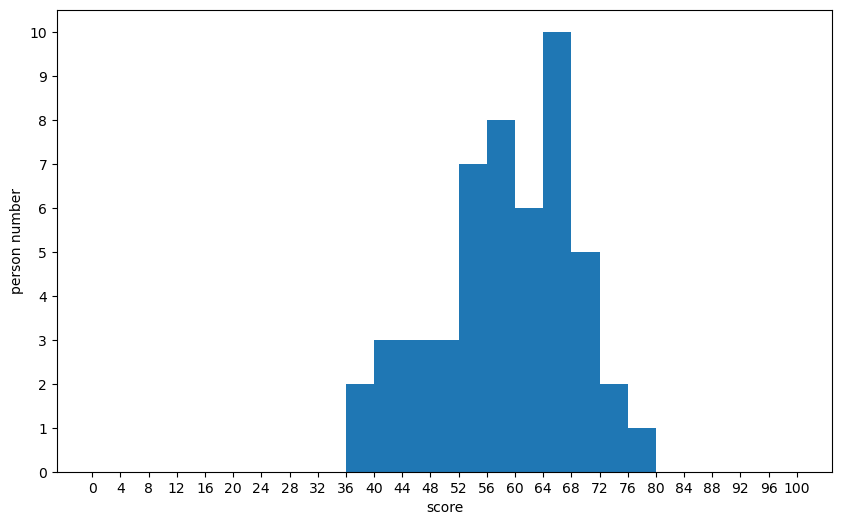

In [184]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

freq, _ , _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()

In [ ]:
fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(111)

freq, _ , _ = ax.hist(english_scores, bins=25, range=(0, 100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100, 25+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()